In [13]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

## California Housing Prices

In [413]:
data = pd.read_csv("housing.csv")
data.drop('ocean_proximity', axis = 1, inplace = True)
data.dropna(inplace = True)
data.reset_index(inplace = True)

In [349]:
data.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


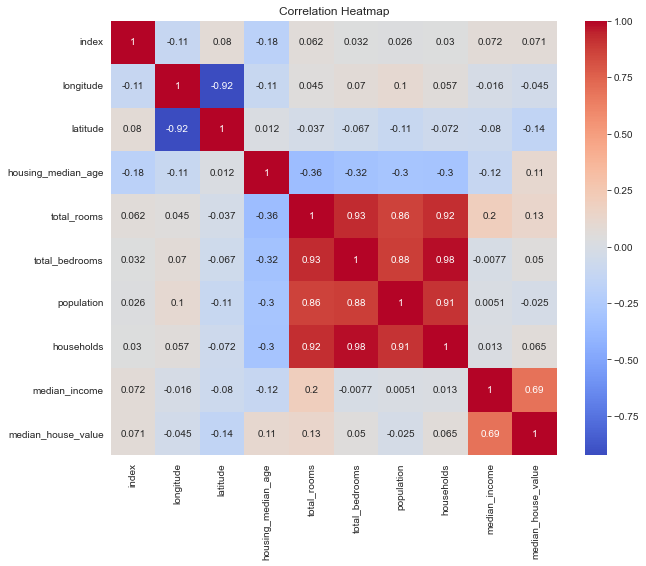

In [350]:
plt.figure(figsize = (10, 8))
correlations = data.corr()
sns.heatmap(correlations, annot = True, cmap = "coolwarm")
plt.title("Correlation Heatmap")
plt.show()

Analysing the correlation heatmap, we can see that the following features have high degree of correlation amongst each other: <br>
- total_rooms <br>
- total_bedrooms <br>
- population <br>
- households

A linear regression model has been constructed using "population" as the target variable and rest as input features

In [351]:
import statsmodels.api as sm

input_features = ['total_rooms', 'total_bedrooms', 'households']
target_feature = 'population'

X = data[input_features]
Y = data[target_feature]

X = sm.add_constant(X)
model = sm.OLS(Y.astype(float), X.astype(float)).fit()

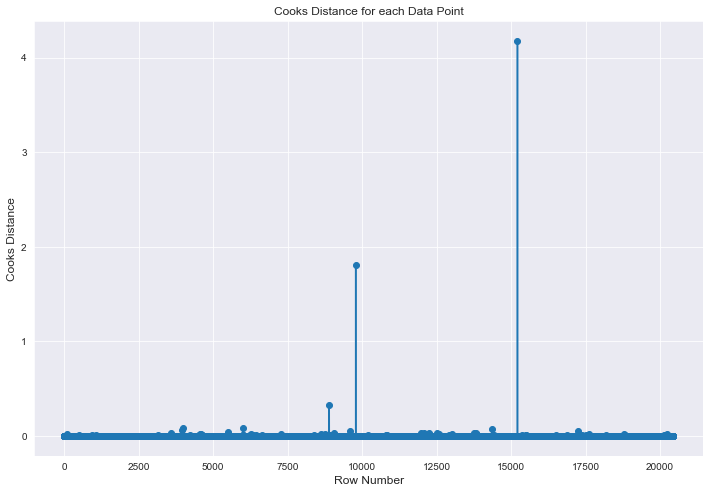

In [353]:
influence = model.get_influence()
cooks_dist = influence.cooks_distance
mean_dist = np.mean(cooks_dist[0])

plt.figure(figsize = (12, 8))
plt.scatter(data.index, cooks_dist[0])
plt.plot(data.index, cooks_dist[0])
plt.xlabel('Row Number', fontsize = 12)
plt.ylabel('Cooks Distance', fontsize = 12)
plt.title('Cooks Distance for each Data Point')
plt.show()

In [354]:
data1 = data[['total_rooms', 'total_bedrooms', 'households', 'population']]
influential_points = data1.index[cooks_dist[0] > (4 * mean_dist)]
print("INFLUENTIAL POINTS")
data1.iloc[influential_points, :]

INFLUENTIAL POINTS


,total_rooms,total_bedrooms,households,population
95,5329.0,2477.0,2323.0,3469.0
104,5871.0,1914.0,1789.0,2689.0
116,5022.0,1750.0,1661.0,2558.0
483,5161.0,1744.0,1742.0,3276.0
506,7355.0,2408.0,2051.0,3100.0
...,...,...,...,...
20114,3445.0,898.0,894.0,5558.0
20132,15207.0,2924.0,2829.0,6301.0
20222,15572.0,2222.0,2152.0,5495.0
20246,25187.0,3521.0,3478.0,11956.0


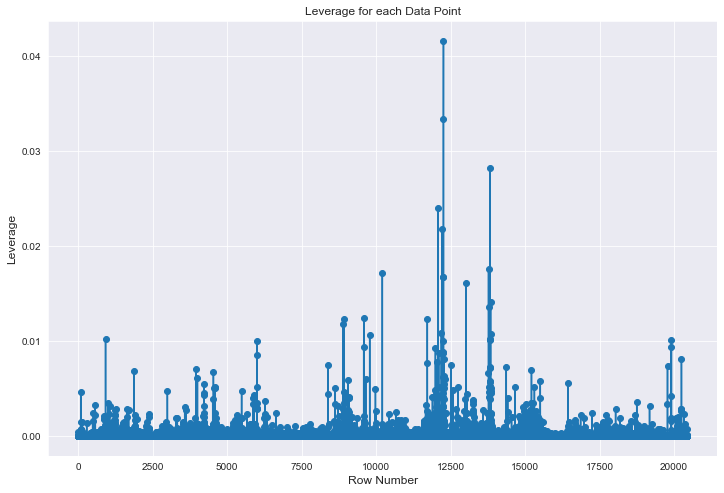

In [355]:
lev = influence.hat_matrix_diag
mean_lev = np.mean(lev)

plt.figure(figsize = (12, 8))
plt.scatter(data.index, lev)
plt.plot(data.index, lev)
plt.xlabel('Row Number', fontsize = 12)
plt.ylabel('Leverage', fontsize = 12)
plt.title('Leverage for each Data Point')
plt.show()

In [356]:
leverage_points = data1.index[lev > (4 * mean_lev)]
print("LEVERAGE POINTS")
data1.iloc[leverage_points, :]

LEVERAGE POINTS


,total_rooms,total_bedrooms,households,population
95,5329.0,2477.0,2323.0,3469.0
98,3682.0,1270.0,1250.0,2024.0
104,5871.0,1914.0,1789.0,2689.0
116,5022.0,1750.0,1661.0,2558.0
283,12842.0,2048.0,1967.0,4985.0
...,...,...,...,...
20246,25187.0,3521.0,3478.0,11956.0
20322,10509.0,2186.0,2138.0,5633.0
20323,15018.0,3008.0,2962.0,7984.0
20336,6861.0,1820.0,1767.0,3717.0


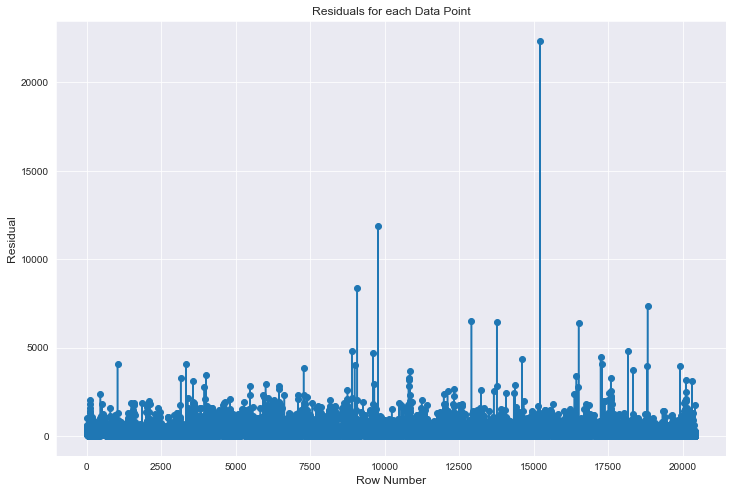

In [357]:
residuals = np.abs(model.resid)
mean_res = np.mean(residuals)

plt.figure(figsize = (12, 8))
plt.scatter(data.index, residuals)
plt.plot(data.index, residuals)
plt.xlabel('Row Number', fontsize = 12)
plt.ylabel('Residual', fontsize = 12)
plt.title('Residuals for each Data Point')
plt.show()

In [358]:
outlier_points = data1.index[residuals > (4 * mean_res)]
print("OUTLIER POINTS")
data1.iloc[outlier_points, :]

OUTLIER POINTS


,total_rooms,total_bedrooms,households,population
95,5329.0,2477.0,2323.0,3469.0
98,3682.0,1270.0,1250.0,2024.0
101,5806.0,1603.0,1497.0,2563.0
104,5871.0,1914.0,1789.0,2689.0
112,3959.0,1196.0,1217.0,1749.0
...,...,...,...,...
20207,7268.0,1729.0,1653.0,3232.0
20246,25187.0,3521.0,3478.0,11956.0
20320,1777.0,513.0,504.0,4479.0
20337,8800.0,1857.0,1832.0,6330.0
